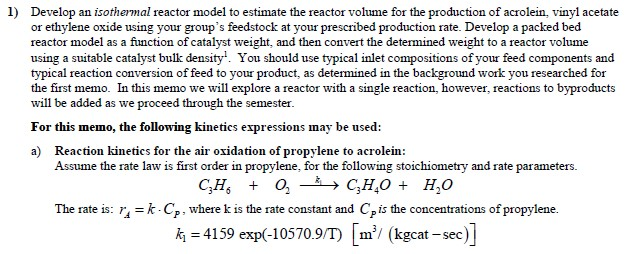

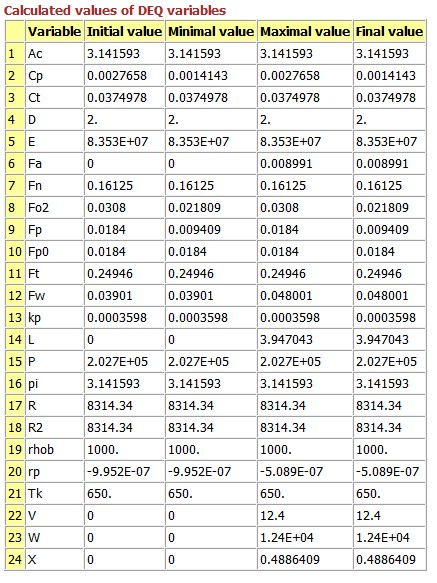

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [43]:
#This function is to return the values of the 3 derivatives for the reaction A +  => B + C/2 with first order kinetics
def  ODEfun(W,Yfuncvec):#fun(t,y) and return dy/dt
       
    Fp= Yfuncvec[0]
    Fa= Yfuncvec[1]
    Fo2= Yfuncvec[2]
    Fw=Yfuncvec[3]
       
    #Explicit equations (Remember to copy these equations in the Table printout cell)
    R = 8314.34 #m^3*Pa/kg-mol*K
    P=202650#Pa
    R2 = 8314.34 #J/kg-mol*K
    E=10047*R2
    Tk=650#K
    kp = 4159 * np.exp(-10570.9/Tk) # m3-kgcat-s
    Fn= 0.16125#kmol/s
    Ft=Fp+Fa+Fo2+Fw+Fn       
    Ct=P/R/Tk
    Cp=Fp/Ft*Ct
    
    rp = -kp*Cp # kmol/kgcat-s
    
    #Differential equations   
    dFpdW = rp #kmol/kgcat-s
    dFadW = -rp #kmol/kgcat-s
    dFo2dW = rp #kmol/kgcat-s
    dFwdW = -rp #kmol/kgcat-s  
      
    dYfuncvecdW = [dFpdW, dFadW, dFo2dW,dFwdW] 
    return dYfuncvecdW   

In [44]:
#test your equations with your spreadsheet or hand calculations
Fp =0.0184
Fa = 0
Fo2 =0.03080
Fw = 0.03901


#Explicit equations 
R = 8314.34 #m^3*Pa/kg-mol*K
P=202650#Pa
R2 = 8314.34 #J/kg-mol*K
E=10047*R2
Tk=650#K
kp = 4159 * np.exp(-10570.9/Tk) # m3-kgcat-s
Fn= 0.16125#kmol/s
Ft=Fp+Fa+Fo2+Fw+Fn       
Ct=P/R/Tk
Cp=Fp/Ft*Ct

rp = -kp*Cp # kmol/kgcat-s

#Differential equations   
dFpdW = rp #kmol/kgcat-s
dFadW = -rp #kmol/kgcat-s
dFo2dW = rp #kmol/kgcat-s
dFwdW = -rp #kmol/kgcat-s 
print(kp,Ft,Cp,Ct,rp,dFpdW)

0.0003598248627754999 0.24946000000000002 0.0027658102145755644 0.037497772615653284 -9.952072809227284e-07 -9.952072809227284e-07


In [45]:
#test of function ODEfun.  This will return values of dFA/dV=rA, dFB/dV=-rA, dFC/dV=-ra/2 at a value of V

y0=[0.0184,0,0.03080,0.03901]# Initial values for the N's 
tspan=(0,12400)# start and end of the integration

sol=ODEfun(0,y0)#Evaluates the derivatives at t=0s
print (sol)

[-9.952072809227284e-07, 9.952072809227284e-07, -9.952072809227284e-07, 9.952072809227284e-07]


In [46]:
#test of solve_ivp function (python ODE solver from scipy library)

#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of all the molar fowrates F's
sol=solve_ivp(ODEfun,tspan,y0)#to match POLYMATH you may need to add rtol=1e-6 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.57549637e-01, 5.03304601e+00, 5.07880097e+01,
       5.08337647e+02, 5.08383402e+03, 1.24000000e+04])
 t_events: None
        y: array([[1.84000000e-02, 1.83995446e-02, 1.83949918e-02, 1.83495248e-02,
        1.79009902e-02, 1.39765320e-02, 9.40902753e-03],
       [0.00000000e+00, 4.55351096e-07, 5.00824232e-06, 5.04752378e-05,
        4.99009845e-04, 4.42346797e-03, 8.99097247e-03],
       [3.08000000e-02, 3.07995446e-02, 3.07949918e-02, 3.07495248e-02,
        3.03009902e-02, 2.63765320e-02, 2.18090275e-02],
       [3.90100000e-02, 3.90104554e-02, 3.90150082e-02, 3.90604752e-02,
        3.95090098e-02, 4.34334680e-02, 4.80009725e-02]])
 y_events: None


In [77]:
#Making a table of numbers to Troubleshoot Codes
#(The Explicit equations are from your ODEfun cell)
#Explicit equations 
R = 8314.34 #m^3*Pa/kg-mol*K
P=202650#Pa
R2 = 8314.34 #J/kg-mol*K
E=10047*R2
Tk=650#K

Fn= 0.16125#kkmol/s

numrows=21
y0=[0.0184,0,0.03080,0.03901]# Initial values for the N's 
tspan=(0,12400)# start and end of the integration

teval=np.linspace(tspan[0],tspan[1],numrows)

sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)

#If you add aditional array definitions you will need to initialize them here 
#(e.g. to graph kp you need an array so add kp=np.zeros(numrows) and kp[row]=4159*np.exp(-10570.9/Tk)  
#In this example it is a constant
print('Important Constants')
print('E={:8.1e} J/kmol '.format(E))
print('')

Ft=np.zeros(numrows)
Cp=np.zeros(numrows)
X=np.zeros(numrows)
rp=np.zeros(numrows)

# print a table
print('                                        Table of Results ')
print('    W        Fp       Fa      Fo2      Fw       Ft         Cp       X         kp              rp   ')
print('  (kgcat) (kmol/s) (kmol/s) (kmol/s) (kmol/s)          (kmol/m^3)        (m^3/kgcat/s)   (kmol/m^3/s)  ')    

row=0
for row in range(numrows):
#unpack your y variables from your dy/dt ODE's (for dT/dW and dP/dW add 2 more! (e.g. Tk=sol.y(x,row)))
    Fp= sol.y[0,row]
    Fa= sol.y[1,row]
    Fo2= sol.y[2,row]
    Fw=sol.y[3,row]
# for pressure drop and energy balance you will need to add Tk=sol.y[x,row] and P=sol.y[x,row]

#Create some new arrays of numbers:    
    Ft[row]=Fp+Fa+Fo2+Fw+Fn
    Ct=P/R/Tk#When you have dT/dW and dP/dW you will need to make this Ct[row]=
    
    Cp[row]=Fp/Ft[row]*Ct
    X[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0]
    kp = 4159 * np.exp(-10570.9/Tk) # m3-kgcat-s
    rp[row] = -kp*Cp[row]#
   
    print('{:8.1f} {:8.5f} {:8.5f} {:8.5f} {:8.5f} {:8.5f}  {:8.5f} {:8.5f}  {:10.7e} {:10.7e} '.format(sol.t[row],
                            sol.y[0,row],sol.y[1,row],sol.y[2,row],sol.y[3,row],Ft[row],Cp[row],X[row],kp,rp[row] ))

Important Constants
E= 8.4e+07 J/kmol 

                                        Table of Results 
    W        Fp       Fa      Fo2      Fw       Ft         Cp       X         kp              rp   
  (kgcat) (kmol/s) (kmol/s) (kmol/s) (kmol/s)          (kmol/m^3)        (m^3/kgcat/s)   (kmol/m^3/s)  
     0.0  0.01840  0.00000  0.03080  0.03901  0.24946   0.00277  0.00000  3.5982486e-04 -9.9520728e-07 
   620.0  0.01779  0.00061  0.03019  0.03962  0.24946   0.00267  0.03298  3.5982486e-04 -9.6238721e-07 
  1240.0  0.01721  0.00119  0.02961  0.04020  0.24946   0.00259  0.06487  3.5982486e-04 -9.3064935e-07 
  1860.0  0.01664  0.00176  0.02904  0.04077  0.24946   0.00250  0.09571  3.5982486e-04 -8.9995811e-07 
  2480.0  0.01609  0.00231  0.02849  0.04132  0.24946   0.00242  0.12553  3.5982486e-04 -8.7027912e-07 
  3100.0  0.01556  0.00284  0.02796  0.04185  0.24946   0.00234  0.15437  3.5982486e-04 -8.4157900e-07 
  3720.0  0.01505  0.00335  0.02745  0.04236  0.24946   0.00226  0.18226  

21 21


Text(0, 0.5, 'Reaction Rate, ($kmol/m^3/s$)')

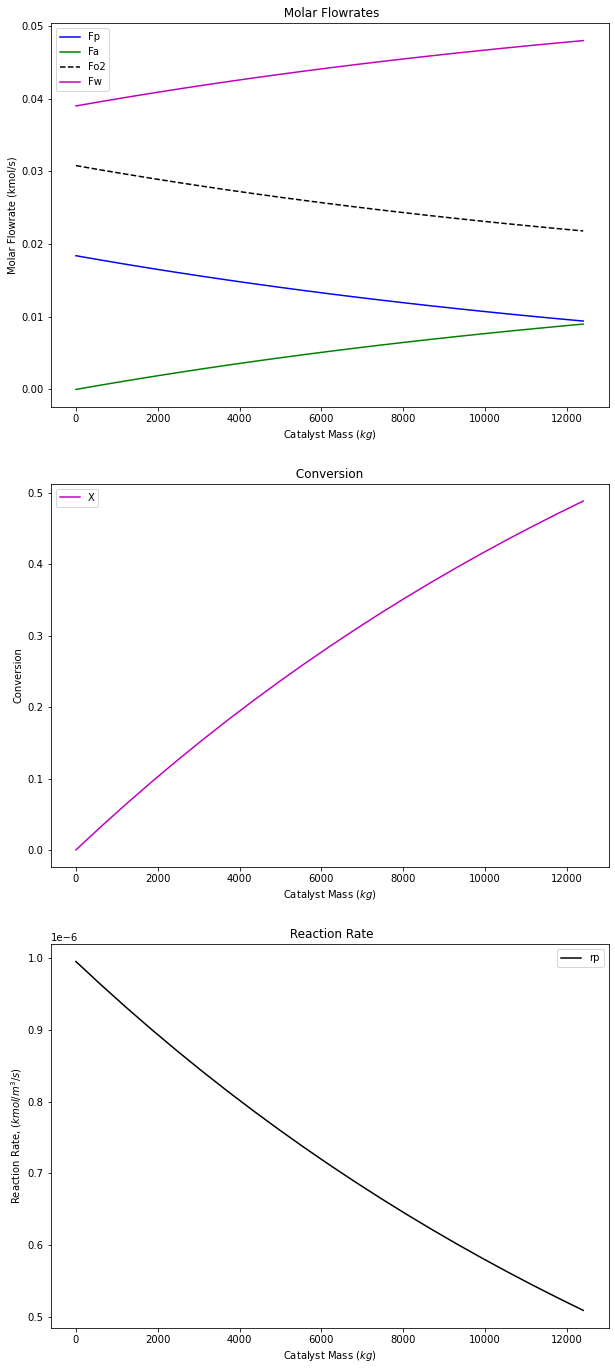

In [65]:
print(len(X),len(sol.t))

plt.figure(figsize=(10,24))

plt.subplot (3,1,1)
plt.plot(sol.t,sol.y[0],'b',label='Fp')
plt.plot(sol.t,sol.y[1],'g',label='Fa')
plt.plot(sol.t,sol.y[2],'k',linestyle='--',label='Fo2')
plt.plot(sol.t,sol.y[3],'m',label='Fw')
plt.legend()
plt.title(' Molar Flowrates')
plt.xlabel('Catalyst Mass $(kg)$')
plt.ylabel('Molar Flowrate (kmol/s)')

plt.subplot (3,1,2)

plt.plot(sol.t,X,'m',label='X')

plt.legend()
plt.title(' Conversion ')
plt.xlabel('Catalyst Mass $(kg)$')
plt.ylabel('Conversion')
plt.subplot (3,1,3)
plt.plot(sol.t,-rp,'k',label='rp')

plt.legend()
plt.title(' Reaction Rate')
plt.xlabel('Catalyst Mass $(kg)$')
plt.ylabel('Reaction Rate, ($kmol/m^3/s$)')

For more information on solve_ivp see https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html